# Examen Final - Simulación Matemática - P2021.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5f/RREA_Monte_Carlo_simulation.png" width="600px" height="400px" />

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo del curso.

> El examen consta tres ejercicios, relativos a cada uno de los módulos del curso respectivamente:
  1. Optimización.
  2. Simulación Montecarlo.
  3. Ecuaciones diferenciales.
>  
>  Estos ejercicios deben ser resueltos usando los conceptos de simulación y las herramientas de programación vistos en clase.

**Criterio de revisión.**
> Cada ejercicio equivale un tercio de la calificación final. Se calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
___

 <font color='navy'> **Nombres:** <font color='black'> María del Carmen Martínez Hernández.

 <font color='navy'> **Fecha:** <font color='black'>  28 de noviembre de 2022.

 <font color='navy'> **Expediente:** <font color='black'> NT729340.
    
 <font color='navy'> **Profesor:** <font color='black'> Oscar David Jaramillo Zuluaga.

## I. Optimización - Modelando la relación de los peces con su tamaño (34 Puntos)

En 1981, 78 peces "agallas azules" fueron tomados aleatoriamente del Lake Mary, en Minnesota. Los investigadores (Cook and Weisberg, 1999) midieron y registraron datos de longitud (en mm) y edad (en años) de dichos peces. Esta información se encuentra en el archivo `bluegills_dataset.txt` (datos separados por tabulador).

Este archivo se puede cargar en memoria de la siguiente manera, usando pandas:

In [9]:
# Importar pandas
import pandas as pd

In [10]:
# Cargar datos en memoria
data = pd.read_csv("bluegills_dataset.txt", sep="\t")
data

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


**Punto 1** (4 puntos) Realizar un gráfico de dispersión de puntos de la edad de los peces (eje x) vs. la longitud de los mismos (eje y). Asegúrese de etiquetar los ejes.

In [11]:
# Importar el módulo optimize de la librería scipy
import scipy.optimize as opt

# Importar librería numpy
import numpy as np

# Importar matplotlib.pyplot
import matplotlib.pyplot as plt

In [12]:
# Nombrar variables
x = data.iloc[:,0]
y = data.iloc[:,1]

In [13]:
# Preprocesar los datos
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

Text(0, 0.5, 'longitud (mm)')

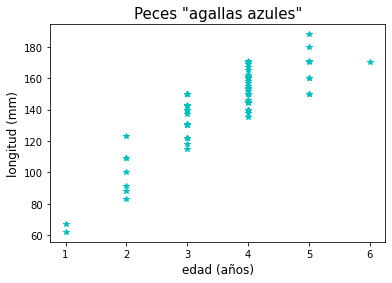

In [14]:
# Graficar
plt.plot(x, y, '*c')

# Agregar título y etiquetar ejes
plt.title('Peces "agallas azules"',fontsize=15)
plt.xlabel('edad (años)',fontsize=12)
plt.ylabel('longitud (mm)',fontsize=12)

**Punto 2** (10 puntos) Ajustar polinomios de grado 1 hasta grado 3, usando un enfoque de ajuste robusto (es decir, usando la función de Huber como función de pérdida).

In [15]:
# Definir función objetivo
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [17]:
# Ajustar polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args = (x_norm,y_norm,1))

# Ajustar polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args = (x_norm,y_norm,2))

# Ajustar polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args = (x_norm,y_norm,3))

In [18]:
# Especificar ajustes
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)

In [19]:
# Importar matplotlib.pyplot
import matplotlib.pyplot as plt

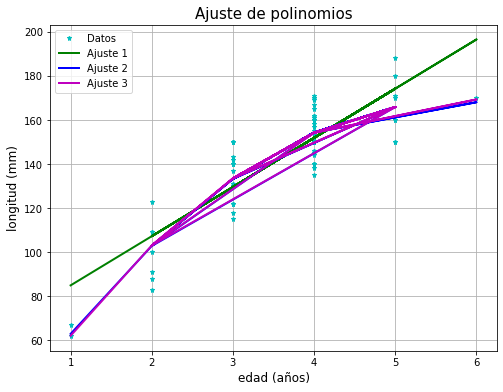

In [20]:
# Graficar
plt.figure(figsize=(8,6))

plt.plot(x, y, 'c*', ms=5, label='Datos')
plt.plot(x, yhat1, 'g', lw=2, label='Ajuste 1')
plt.plot(x, yhat2, 'b', lw=2, label='Ajuste 2')
plt.plot(x, yhat3, 'm', lw=2, label='Ajuste 3')

plt.title('Ajuste de polinomios',fontsize=15)
plt.xlabel('edad (años)',fontsize = 12)
plt.ylabel('longitud (mm)',fontsize = 12)

plt.grid()
plt.legend(loc='best')
plt.show()

**Punto 3** (5 puntos) Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.

Text(0, 0.5, 'error')

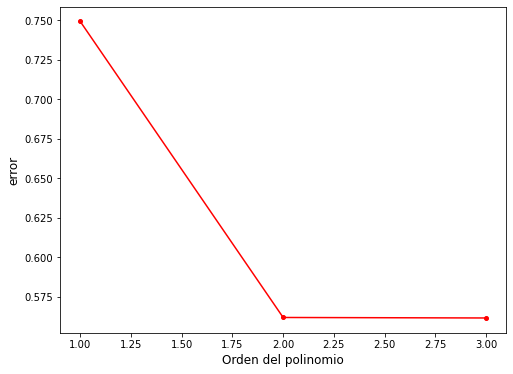

In [21]:
# Graficar el error
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ro-', ms = 4)
plt.xlabel('Orden del polinomio', fontsize = 12)
plt.ylabel('error', fontsize = 12)

**Conclusión :** Según la gráfica anterior, el polinomio que mejor se ajusta es el de 2do orden.

**Punto 4** (5 puntos) Realizar un gráfico de dispersión de puntos de la edad de los peces (eje x) vs. la longitud de los mismos (eje y). Además, incluir el gráfico del polinomio ajustado elegido en el punto anterior. Asegúrese de etiquetar los ejes y las gráficas.

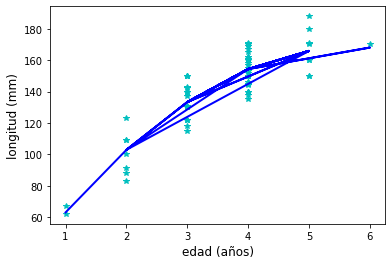

In [55]:
# Graficar
plt.plot(x, y, '*c')

# Etiquetar ejes
plt.xlabel('edad (años)',fontsize=12)
plt.ylabel('longitud (mm)',fontsize=12)

# Agregar polinomio de mejor ajuste
plt.plot(x, yhat2, 'b', lw=2, label='Ajuste 2')

**Punto 5** (10 puntos) Supongamos que vas al Lake Mary de pesca con tu mejor amig@. Después de un par de horas, pescan precisamente un pez agallas azules "bluegills", que resulta medir 150 mm. De acuerdo al modelo que elegiste, ¿Cuántos años estimas que tenía el pescado?

In [84]:
# Mostrar los datos arrojados por el polinomio de 2do orden
yhat2

array([ 62.95301791,  62.95301791, 102.84633773, 102.84633773,
       102.84633773, 102.84633773, 133.30232738, 133.30232738,
       133.30232738, 133.30232738, 133.30232738, 133.30232738,
       133.30232738, 133.30232738, 133.30232738, 102.84633773,
       133.30232738, 154.32098688, 154.32098688, 154.32098688,
       154.32098688, 154.32098688, 154.32098688, 154.32098688,
       154.32098688, 154.32098688, 154.32098688, 154.32098688,
       154.32098688, 154.32098688, 154.32098688, 154.32098688,
       154.32098688, 154.32098688, 154.32098688, 154.32098688,
       154.32098688, 165.90231621, 154.32098688, 154.32098688,
       154.32098688, 165.90231621, 102.84633773, 102.84633773,
       154.32098688, 133.30232738, 154.32098688, 133.30232738,
       154.32098688, 154.32098688, 154.32098688, 154.32098688,
       133.30232738, 133.30232738, 133.30232738, 154.32098688,
       154.32098688, 133.30232738, 154.32098688, 165.90231621,
       150.        , 165.90231621, 154.32098688, 154.32

In [83]:
# Calcular la edad del pescado
yhat2[60] 

150.0

**Conclusión :** De acuerdo con el modelo electo, el pescado tenía 4 años.

___
## II. Simulación Montecarlo - Probabilidad de crecimiento del mercado por encima de su media (33 puntos)

El índice Standard & Poor's 500 (Standard & Poor's 500 Index), también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado.

El índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado en Estados Unidos. Los componentes del índice S&P 500 y su ponderación son determinados por S&P Dow Jones Indices. Se diferencia de otros índices de mercados financieros de Estados Unidos, tales como el Dow Jones Industrial Average o el índice Nasdaq Composite, en la diversidad de los rubros que lo conforman y en su metodología de ponderación. Es uno de los índices de valores más seguidos, y muchas personas lo consideran el más representativo del mercado de acciones de Estados Unidos, y el marcador de tendencias de la economía norteamericana. El National Bureau of Economic Research ha clasificado a las acciones comunes como un indicador relevante de los ciclos de negocios.

Fuente: https://es.wikipedia.org/wiki/S%26P_500

**Punto 1** (5 puntos) Descargar los precios diarios ajustados en el cierre del índice S&P500 (clave de cotización `^GSPC`) desde el primer día de 2010 hasta el día en que realice el examen, usando la función `get_closes` vista en la clase 11. Graficar los precios diarios a través del tiempo.

In [2]:
# Importar librerías
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web

In [3]:
data_SP = web.DataReader('^GSPC', 'yahoo', '1/1/2010', '11/28/2022')
data_SP['Adj Close']

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
                 ...     
2022-11-21    3949.939941
2022-11-22    4003.580078
2022-11-23    4027.260010
2022-11-25    4026.120117
2022-11-28    3963.939941
Name: Adj Close, Length: 3249, dtype: float64

In [4]:
# Escribir una función para generalizar la importación desde Yahoo
def get_closes(names, start, end):
    data_closes = web.DataReader(names, 'yahoo', start, end)
    return data_closes['Adj Close']

In [5]:
# Descargar datos...
names = '^GSPC'
start = '01/01/2010'
end = '11/28/2022'

precios = get_closes(names, start, end)
precios

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
                 ...     
2022-11-21    3949.939941
2022-11-22    4003.580078
2022-11-23    4027.260010
2022-11-25    4026.120117
2022-11-28    3963.939941
Name: Adj Close, Length: 3249, dtype: float64

<AxesSubplot:xlabel='Date'>

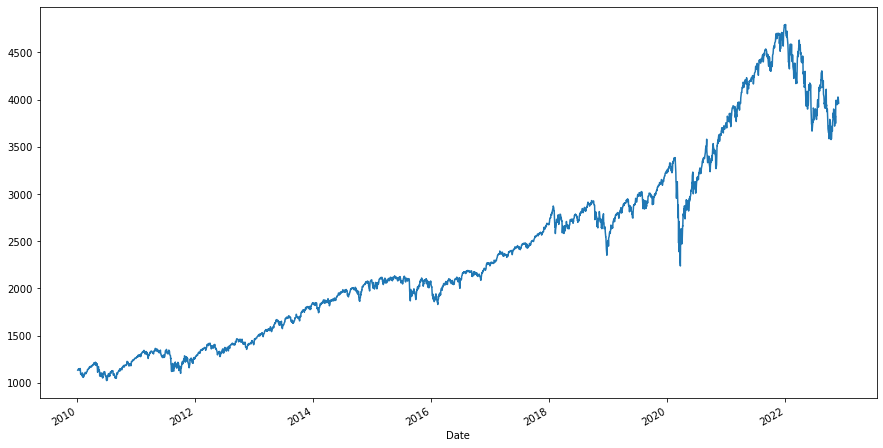

In [26]:
# Graficar
precios.plot(figsize=(15,8))

**Conclusión :** De manera general, los precios diarios tienden a incrementar a largo plazo.

**Punto 2.** (5 puntos) A partir de los precios diarios descargados en el punto 1, obtenga los rendimientos diarios, y grafíquelos a través del tiempo.

In [7]:
precios.head(4)

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
Name: Adj Close, dtype: float64

In [8]:
# Implementar el método shift
precios.shift().head(4)

Date
2010-01-04            NaN
2010-01-05    1132.989990
2010-01-06    1136.520020
2010-01-07    1137.140015
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

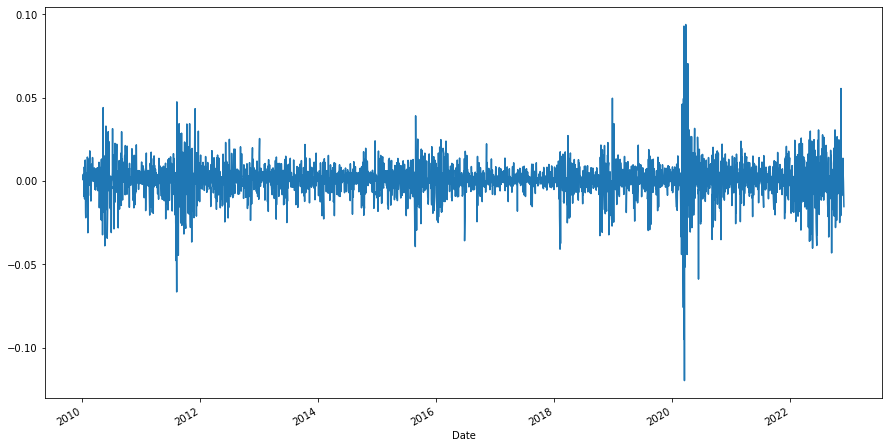

In [11]:
# Calcular los rendimientos
precios_rendi = (precios - precios.shift())/precios.shift()

precios_rendi.plot(figsize=(15, 8))

**Punto 3.** (3 puntos) Obtenga la media y la desviación estándar de los rendimientos diarios calculados en el punto 3.

In [12]:
precios_rendi.describe()

count    3248.000000
mean        0.000449
std         0.011208
min        -0.119841
25%        -0.003812
50%         0.000645
75%         0.005621
max         0.093828
Name: Adj Close, dtype: float64

In [13]:
# Calcular la media (promedio) y volatilidad de rendimientos
precios_rendi.mean() # Promedio de los precios

0.00044871608325996527

In [14]:
# Calcular la desviación estándar (volatilidad)
precios_rendi.std()   # Desviación estándar de los precios

0.011208013153440638

**Punto 4** (5 puntos) Suponiendo que el DataFrame de precios diarios del punto 1 lo llamaste `precios`, la siguiente línea de código obtiene los precios del primer día de cada año:

In [15]:
# Obtener precios anuales
precios_anuales = precios.groupby(by=lambda x: x.year).agg('first')
precios_anuales

Date
2010    1132.989990
2011    1271.869995
2012    1277.060059
2013    1462.420044
2014    1831.979980
2015    2058.199951
2016    2012.660034
2017    2257.830078
2018    2695.810059
2019    2510.030029
2020    3257.850098
2021    3700.649902
2022    4796.560059
Name: Adj Close, dtype: float64

1. A partir de los precios anuales, obtener los rendimientos anuales (*pista: usar el método `pct_change` sobre los precios anuales*).
2. A partir de los rendimientos anuales, obtener el rendimiento medio anual (*pista: usar el método `mean` sobre los rendimientos anuales*).

#### Rendimientos anuales calculados a partir de los precios anuales:

<AxesSubplot:title={'center':'rendimientos simples'}, xlabel='Date'>

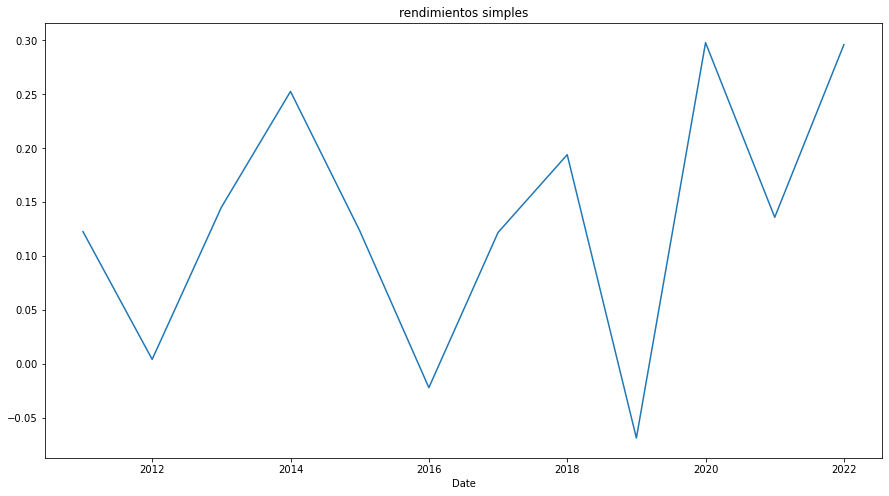

In [16]:
# Calcular rendimientos diarios y graficarlos
rendia = precios_anuales.pct_change()
rendia.plot(figsize=(15, 8), title='rendimientos simples')

#### Rendimiento medio anual calculado a partir de los rendimientos anuales:

In [27]:
rendia.mean()

0.1335616409772618

**Punto 5** (7 puntos) Suponiendo que los rendimientos siguen una distribución normal, simular 10000 de rendimientos para todo un año. A partir de los rendimientos simulados, obtener los precios simulados como vimos en la clase 11.

<AxesSubplot:>

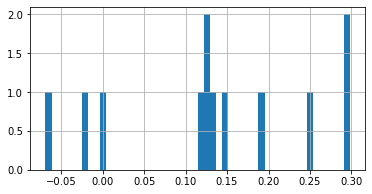

In [29]:
rendia.hist(bins=50, figsize=(6,3))

In [30]:
# Calcular media y desviación estándar
mu_GSPC = rendia.mean()

std_GSPC = rendia.std()

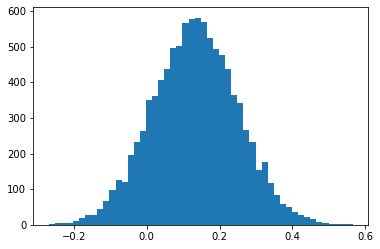

In [33]:
N = 10000
plt.hist(std_GSPC * np.random.randn(N) + mu_GSPC, bins=50);

In [34]:
# Definir función que simula varios escenarios de rendimientos diarios
def sim_rend(mu, std, ndays, nscen, start_date):
    
    # Generar el rango de fechas en las que se realizará la predicción (freq='B' días laborales)
    fechas = pd.date_range(start_date, periods=ndays, freq='B')
    
    # Generar la predicción asumiendo que los rendimientos siguen una distribución normal (gaussiana)
    datos = std*np.random.randn(ndays, nscen) + mu
    
    # Generar un dataframe (tabla) con los resultados
    rendimientos_simulados = pd.DataFrame(datos, index=fechas)
    
    return rendimientos_simulados

In [35]:
# Simular 10000 escenarios para todo el 2010
ndays = 365
nscen = 10000
start_date = '01/01/2010'

rend_simu_GSPC = sim_rend(mu_GSPC, std_GSPC, ndays, nscen, start_date)
rend_simu_GSPC

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2010-01-01,0.134442,0.346159,0.194137,-0.127597,0.183224,0.353914,-0.016688,0.377187,0.136871,0.156537,...,-0.025341,0.160116,0.142577,0.113904,-0.005780,0.184152,0.053713,0.068312,0.299998,-0.051990
2010-01-04,0.051384,0.182402,0.104907,0.116582,0.065960,0.246996,-0.021641,0.136568,0.359839,0.099409,...,0.123697,0.185100,0.044217,0.225358,0.169444,-0.158981,-0.026109,0.217000,-0.145633,0.236530
2010-01-05,0.206713,0.518647,0.034949,0.202313,0.146271,0.056082,0.359889,-0.030728,0.051924,0.230921,...,-0.149992,0.123036,-0.119105,-0.100436,0.001380,0.060267,-0.051232,0.370765,0.266941,0.182654
2010-01-06,0.156370,0.102291,0.155904,0.048757,-0.037704,0.283299,0.121485,0.089034,0.013854,0.199420,...,0.320326,-0.022722,0.078631,0.335340,-0.019950,0.126669,-0.098425,0.279694,0.128077,0.132403
2010-01-07,0.218139,-0.129150,0.425320,0.410023,0.018554,0.223310,0.141115,-0.145417,0.107035,0.048855,...,0.064221,0.175344,0.178924,0.303130,0.259695,0.266651,0.244761,0.181486,0.181580,0.070590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-20,0.001225,-0.066980,-0.061051,0.204577,0.219673,0.150581,0.125796,0.024773,0.023442,0.227502,...,0.090062,-0.010604,0.140149,-0.022731,0.046576,0.192424,-0.133434,0.197245,0.095351,0.061193
2011-05-23,0.188935,0.241294,0.256303,0.162845,0.059737,0.142317,0.276859,0.220023,0.125732,0.380967,...,0.133316,0.005982,0.107193,0.156203,0.008097,0.261830,0.200758,-0.016055,0.267519,-0.157346
2011-05-24,-0.024007,0.015640,0.009422,0.143776,0.282053,0.060552,0.140370,0.457793,0.047459,0.372550,...,0.113934,0.067584,0.001765,0.128318,0.172328,0.140720,0.271930,0.093119,0.143636,0.005525
2011-05-25,0.307232,0.002845,0.153428,0.149224,0.130665,0.153248,0.018968,0.256613,0.190420,0.061533,...,-0.043484,0.192463,0.312864,0.026973,0.255904,0.175080,0.040714,0.101405,0.197539,0.242237


<AxesSubplot:>

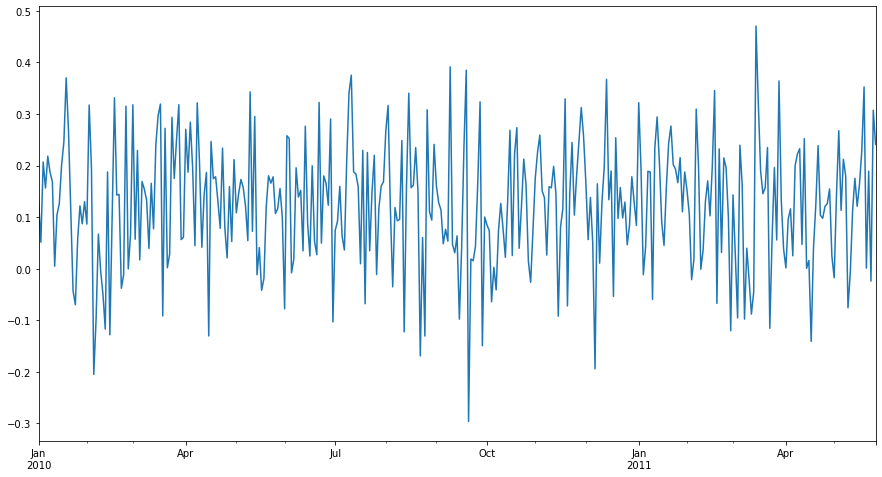

In [36]:
# Mostrar
rend_simu_GSPC.iloc[:, 0].plot(figsize=(15,8), legend=False)

In [41]:
# Obtener los precios. Transformar los rendimientos simulados del 2010 a precios de acción simulados del 2010.
precios_simulados_GSPC = precios[-1]*(1+rend_simu_GSPC).cumprod()
precios_simulados_GSPC

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2010-01-01,4.496861e+03,5.336093e+03,4.733488e+03,3.458153e+03,4.690229e+03,5.366835e+03,3.897789e+03,5.459087e+03,4.506489e+03,4.584442e+03,...,3.863489e+03,4.598629e+03,4.529105e+03,4.415447e+03,3.941027e+03,4.693907e+03,4.176855e+03,4.234726e+03,5.153113e+03,3.757853e+03
2010-01-04,4.727929e+03,6.309405e+03,5.230064e+03,3.861311e+03,4.999596e+03,6.692420e+03,3.813438e+03,6.204623e+03,6.128101e+03,5.040177e+03,...,4.341391e+03,5.449834e+03,4.729370e+03,5.410502e+03,4.608810e+03,3.947665e+03,4.067800e+03,5.153662e+03,4.402651e+03,4.646700e+03
2010-01-05,5.705255e+03,9.581762e+03,5.412847e+03,4.642503e+03,5.730891e+03,7.067742e+03,5.185854e+03,6.013969e+03,6.446294e+03,6.204061e+03,...,3.690217e+03,6.120359e+03,4.166080e+03,4.867090e+03,4.615170e+03,4.185579e+03,3.859398e+03,7.064458e+03,5.577901e+03,5.495437e+03
2010-01-06,6.597389e+03,1.056189e+04,6.256734e+03,4.868855e+03,5.514814e+03,9.070027e+03,5.815857e+03,6.549419e+03,6.535602e+03,7.441276e+03,...,4.872289e+03,5.981291e+03,4.493663e+03,6.499221e+03,4.523097e+03,4.715763e+03,3.479538e+03,9.040348e+03,6.292299e+03,6.223047e+03
2010-01-07,8.036538e+03,9.197818e+03,8.917851e+03,6.865197e+03,5.617133e+03,1.109546e+04,6.636564e+03,5.597024e+03,7.235142e+03,7.804822e+03,...,5.185193e+03,7.030077e+03,5.297686e+03,8.469329e+03,5.697724e+03,5.973224e+03,4.331195e+03,1.068104e+04,7.434853e+03,6.662331e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-20,7.399848e+20,1.390011e+21,2.350773e+22,3.076972e+23,1.083152e+24,3.065904e+23,1.199307e+23,7.688452e+21,8.438649e+20,1.655490e+23,...,8.263947e+21,6.469070e+21,5.607781e+22,1.671660e+21,4.033715e+21,8.045096e+21,1.605949e+22,2.493917e+23,1.589544e+22,5.884274e+22
2011-05-23,8.797942e+20,1.725413e+21,2.953283e+22,3.578042e+23,1.147856e+24,3.502235e+23,1.531345e+23,9.380092e+21,9.499657e+20,2.286178e+23,...,9.365662e+21,6.507771e+21,6.208893e+22,1.932779e+21,4.066375e+21,1.015154e+22,1.928356e+22,2.453876e+23,2.014778e+22,4.958406e+22
2011-05-24,8.586733e+20,1.752399e+21,2.981110e+22,4.092478e+23,1.471612e+24,3.714304e+23,1.746301e+23,1.367423e+22,9.950497e+20,3.137893e+23,...,1.043273e+22,6.947593e+21,6.219849e+22,2.180789e+21,4.767126e+21,1.158007e+22,2.452734e+22,2.682379e+23,2.304173e+22,4.985803e+22
2011-05-25,1.122485e+21,1.757385e+21,3.438496e+22,4.703175e+23,1.663900e+24,4.283512e+23,1.779425e+23,1.718322e+22,1.184528e+21,3.330977e+23,...,9.979069e+21,8.284749e+21,8.165817e+22,2.239612e+21,5.987051e+21,1.360751e+22,2.552596e+22,2.954385e+23,2.759336e+22,6.193551e+22


**Punto 6** (8 puntos) Calcular y graficar la probabilidad de que el precio del índice supere el rendimiento medio de los últimos 10 años que calculaste en el punto 4.

In [43]:
# Umbral de 110% del último precio
umbral = (1 + 0.1)*(precios[-1])

# Fechas
dates = precios_simulados_GSPC.index 
dates

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2011-05-13', '2011-05-16', '2011-05-17', '2011-05-18',
               '2011-05-19', '2011-05-20', '2011-05-23', '2011-05-24',
               '2011-05-25', '2011-05-26'],
              dtype='datetime64[ns]', length=365, freq='B')

In [44]:
TF = precios_simulados_GSPC>=umbral
TF

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2010-01-01,True,True,True,False,True,True,False,True,True,True,...,False,True,True,True,False,True,False,False,True,False
2010-01-04,True,True,True,False,True,True,False,True,True,True,...,False,True,True,True,True,False,False,True,True,True
2010-01-05,True,True,True,True,True,True,True,True,True,True,...,False,True,False,True,True,False,False,True,True,True
2010-01-06,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
2010-01-07,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-20,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2011-05-23,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2011-05-24,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2011-05-25,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

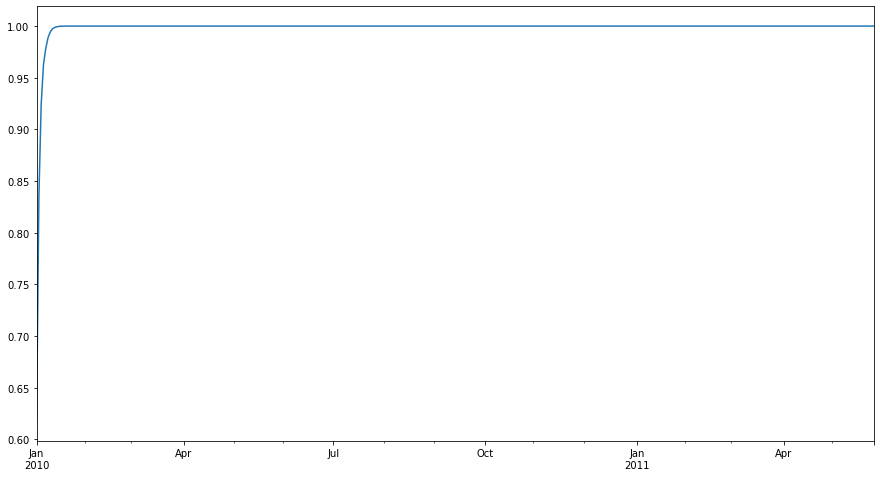

In [45]:
# Comparar cada escenario en cada fecha
TF = precios_simulados_GSPC>=umbral

# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = TF.sum(axis=1)/nscen

# Gráfico de probabilidad
prob.plot(figsize=(15, 8), legend=False)

**Conclusión:** Puesto a que el gráfico de probabilidad es creciente se prevee que efectivamente en algún momento supere el precio umbral (probabilidad 1).

___
## III. Ecuaciones diferenciales - Comparación de solución simbólica y solución numérica de la ecuación diferencial de Euler (33 puntos)

Considere la ecuación diferencial:

$$
x^2 \frac{d^2 y}{d x^2} + 2 x \frac{d y}{d x} - 2 x = 0; \quad y(1) = 0, \quad \left.\frac{dy}{dx}\right|_{x=1} = 1.
$$

**Punto 1** (10 puntos) Resolver la ecuación diferencial de manera simbólica usando `sympy`, y usar las condiciones iniciales para encontrar el valor de las constantes.

In [26]:
# Importar sympy
import sympy as sym
from sympy.core.symbol import symbols

# Imprimir en notación matemática
sym.init_printing(use_latex='mathjax')

In [27]:
# Definir variables
sym.var('x', real=True, positive=True)
y = sym.Function ('y')

# Escribir la ecuacion diferencial
de = sym.Eq(x**2*y(x).diff(x,2) + 2*x*y(x).diff(x)-2*x, 0)
display(de)

     2                               
 2  d              d                 
x ⋅───(y(x)) + 2⋅x⋅──(y(x)) - 2⋅x = 0
     2             dx                
   dx                                

In [28]:
sym.dsolve(de)

            C₂    
y(x) = C₁ + ── + x
            x     

In [33]:
I_Con = {y(1):0, y(x).diff(x).subs(x, 1):1}

In [34]:
sym.dsolve(de, y(x), ics = I_Con)

y(x) = x - 1

**Punto 2** (3 puntos) Definir en python la función $y_{ex}(x)$ de la solución exacta de la ecuación diferencial encontrada en el punto 1.

In [35]:
def y_ex (x):
    yex = x-1
    return yex

**Punto 3** (10 puntos) Resolver la ecuación diferencial de forma numérica, y graficar la solución exacta y la numérica en un mismo gráfico.

In [36]:
# Importar librerías
import numpy as np
from scipy.integrate import solve_ivp, odeint

import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def de2(x,arreglo):
    return np.asarray([arreglo[1], 2*arreglo[1]/x-2/x])

In [38]:
# Definir condiciones iniciales
xspan = [1, 5] #Rango 
y1=0 
m1=1 
Vin = np.array([y1,m1]) #Valores iniciales

In [39]:
sol_num = solve_ivp(de2, xspan, Vin, max_step=0.1)

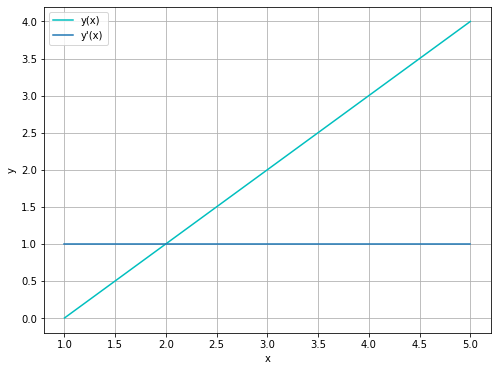

In [111]:
# Graficar solución numérica
plt.figure()
plt.plot(sol_num.t, sol_num.y[0, :], 'c', label="y(x)")
plt.plot(sol_num.t, sol_num.y[1, :], label="y'(x)")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams["figure.figsize"] = (8, 6)
plt.grid()

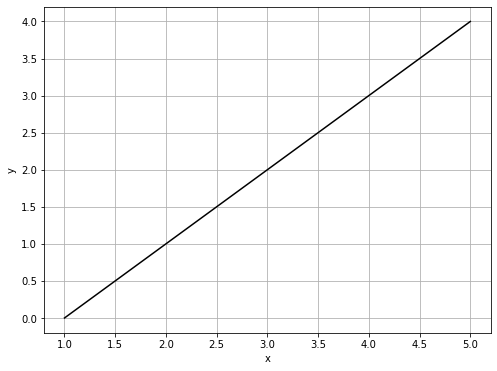

In [110]:
# Graficar solución exacta 
x = np.linspace(1,5,10)
plt.figure(figsize=(8,6))
plt.plot(x, y_ex(x), 'k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0, 0.5, '$y$')

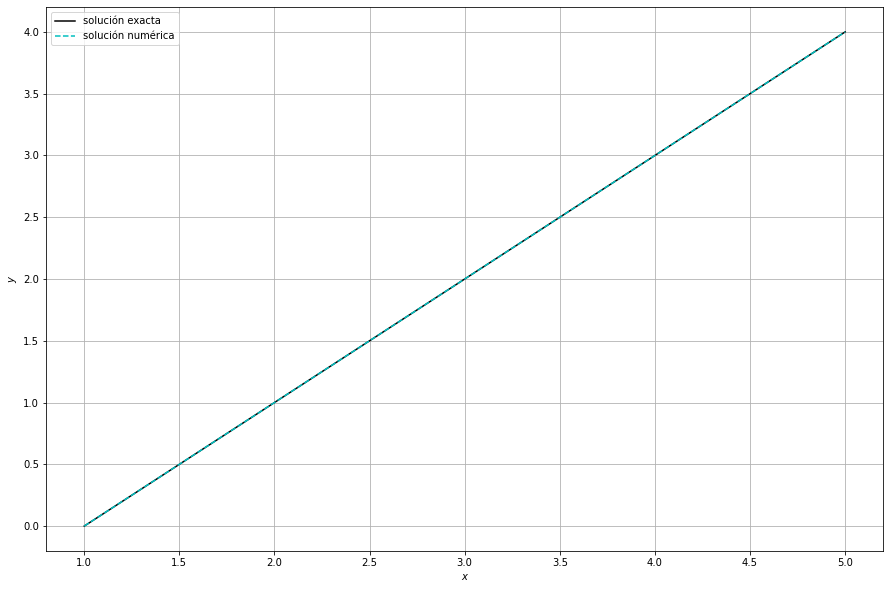

In [109]:
# Mostrar ambas soluciones en un solo gráfico
plt.figure(figsize=(15,10))
plt.plot(x, y_ex(x), 'k',label = 'solución exacta')
plt.plot(sol_num.t, sol_num.y[0, :], 'c--', label = 'solución numérica')
plt.grid()
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

**Punto 4** (10 puntos) ¿Qué pasa con la solución de la ecuación diferencial cuando $x$ tiende a $\infty$ (infinito)?

**Conclusión:** De acuerdo con la gráfica arrojada en donde se incluye tanto la solución analítica como la solución numérica, cuando $x$ tiende a infinito, $y$ también tiende a infinito y por ende la solución de la ecuación continuará incrementando hacia el infinito positivo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>